**What Is Optical Coherence Tomography?**


Optical coherence tomography (OCT) is a non-invasive imaging test. OCT uses light waves to take cross-section pictures of your retina.

With OCT, your ophthalmologist can see each of the retina’s distinctive layers.  This allows your ophthalmologist to map and measure their thickness. These measurements help with diagnosis. They also provide treatment guidance for glaucoma and diseases of the retina. These retinal diseases include age-related macular degeneration (AMD) and diabetic eye disease.


![RETINAL OCT OF A NORMAL EYE](https://www.aao.org/image.axd?id=0acdb964-d6ca-4034-ab9c-a731c5f5edf2&t=635072561627800000)
@IMAGE COURTESYhttps://www.aao.org 



OCT is useful in diagnosing many eye conditions, including:

* macular hole
* macular pucker
* macular edema
* age-related macular degeneration
* glaucoma
* central serous retinopathy
* diabetic retinopathy
* vitreous traction


**ABOUT OUR DATA SET**

* The dataset is organized into 3 folders **(train, test, val)**. It contains subfolders for each image category **(NORMAL,CNV,DME,DRUSEN)**. There are 84,495 X-Ray images (JPEG) and 4 categories (NORMAL,CNV,DME,DRUSEN). 

* Images are labeled as (disease)-(randomized patient ID)-(image number by this patient) and split into 4 directories: CNV, DME, DRUSEN, and NORMAL.
 

**WHAT ALL TO EXPECT FROM THIS KERNEL**

1. Feature map visualization and filter visualization.

2. Modular code so that functions in this kernel can be used easily by everyone,all you need to do is define the model and pass it through function call to convert_data function as demonstrated in last line by convert_data(model). 

3. You can easily increase accuracy by adjusting hyper-parameters, for demonstration purposes,due to memory constraints and since I just wanted to show feature map visualization and filter visualization while maintaining modularity of code.

4. Scalable approach thus you can easily put in any adaptive learning model or a bigger CNN too and pass the model to convert_data function. It will detect all convolutional layers and plot 32 feature maps of each convolutional layer in model.  


**HOW WILL VISUALIZATION OF FEATURES AND FILTERS HELP**

1. What I find best part about feature visualization is that it kind of tells us how our eye detects feature. If suppose we have an object we analyze many features of that object like its shape,colour,size etc, when we see an object say in a photograph our eye tries to find patterns in the photograph that is peculiar to something it has seen before.These patterns thus play a vital role in discerning the object we detect.What more images in these dataset is of an eye itself (talk about inception :P).

2. Large Convolutional Network models have recently demonstrated impressive classification performance on the ImageNet benchmark. However there is no clear understanding of why they perform so well, or how they might be improved. Thus visualization can help to gain an insight to what our model has learnt.

3. The patterns so detected can be study to adjust hyperparameters and filters in a way to get more accuracy.

**I would be grateful to anyone who can help me improve my code I am still learning. Any suggestions are appreciated. I tried to maintain modularity while coding for easy understanding. Thank you.**

**So let's get started with this kernel**


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/oct2017/OCT2017 /test"))

# Any results you write to the current directory are saved as output.

['NORMAL', 'DME', '.DS_Store', 'CNV', 'DRUSEN']


In [2]:
TRAIN_PATH='../input/oct2017/OCT2017 /train'
TEST_PATH='../input/oct2017/OCT2017 /test'
VAL_PATH='../input/oct2017/OCT2017 /val'

In [3]:
import os

import gc
import re
import operator 

import numpy as np
import pandas as pd

from gensim.models import KeyedVectors

from sklearn import model_selection


import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout


from sklearn.model_selection import train_test_split, cross_val_score
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D, GRU, CuDNNGRU, CuDNNLSTM, BatchNormalization
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten, Masking
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from keras.models import Model, load_model
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras import backend as K
from keras.engine import InputSpec, Layer
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint,  Callback, EarlyStopping, ReduceLROnPlateau


/opt/conda/lib/python3.6/site-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')
Using TensorFlow backend.


In [4]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable

**Starting with making model I made a simple model with 4 convolution layers. My primary objective is just to plot feature maps to see detections by filters.**

In [5]:
def create_model(in_shape,pool_size,kernal_size):
    inputs=Input(shape=in_shape)
    x=Convolution2D(filters=32,kernel_size=kernal_size,activation='relu')(inputs)
    x=MaxPooling2D(pool_size=pool_size)(x)
    x=Dropout(0.3)(x)
    x=Convolution2D(filters=64,kernel_size=kernal_size,activation='relu')(x)
    x=MaxPooling2D(pool_size=pool_size)(x)
    x=Dropout(0.3)(x)
    x=Convolution2D(filters=128,kernel_size=kernal_size,activation='relu')(x)
    x=MaxPooling2D(pool_size=pool_size)(x)
    x=Dropout(0.3)(x)
    x=Convolution2D(filters=128,kernel_size=kernal_size,activation='relu')(x)
    x=MaxPooling2D(pool_size=pool_size)(x)
    x=Dropout(0.3)(x)
    x=Flatten()(x)
    x=Dense(4,activation='softmax')(x)
    return x,inputs
    

In [6]:
out,ins=create_model(in_shape=(256,256,3),pool_size=(2,2),kernal_size=(3,3))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


**Creating model**

In [7]:
model=Model(input=ins,output=out)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

**Creating call back for early stopping.**

In [9]:
from keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)


In [10]:
import warnings
warnings.filterwarnings("ignore")

**Using ImageDataGenerator for model training also . Epochs can be increased to get better accuracy on validation data as much as I tested validation accuracy of about 0.94 was achieved by 25 epochs. Also a better accuracy will be met when steps_per_epoch is equal to number of images in training set**

In [11]:
from keras.preprocessing.image import ImageDataGenerator
def model_trainer(model):
    train_datagen = ImageDataGenerator(rescale = 1./150, 
                                   shear_range = 0.01, 
                                   zoom_range =[0.9, 1.25],
                                   rotation_range=20,
                                   zca_whitening=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   brightness_range=[0.5, 1.5],
                                   horizontal_flip = True)
    test_datagen = ImageDataGenerator(rescale = 1./160)

    train_generator = train_datagen.flow_from_directory(
        TRAIN_PATH,
        target_size=(256,256),
        batch_size=32,
        class_mode='categorical')

    validation_generator = test_datagen.flow_from_directory(
        TEST_PATH,
        target_size=(256,256),
        batch_size=32,
        class_mode='categorical')# multiclass then  categorical

    hist=model.fit_generator(
        train_generator,
        steps_per_epoch=2000, # no of images in training set
        epochs=10,
        shuffle=True,
        validation_data=validation_generator,
        validation_steps=968,callbacks=[early_stop]) # no of  images in test
    return hist,train_generator

In [12]:
hist,train_generator=model_trainer(model)
print(hist)


Found 83484 images belonging to 4 classes.
Found 968 images belonging to 4 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
2000/2000 [==============================] - 1751s 876ms/step - loss: 0.9038 - acc: 0.6503 - val_loss: 0.9764 - val_acc: 0.5522
Epoch 2/10
2000/2000 [==============================] - 1570s 785ms/step - loss: 0.6119 - acc: 0.7782 - val_loss: 0.4567 - val_acc: 0.8364
Epoch 3/10
1953/2000 [============================>.] - ETA: 32s - loss: 0.4972 - acc: 0.8249

**Taking a sample image. The very first image in test folder under DME class.**

In [13]:
#VISUAL ANALYSIS 
import numpy as np   
from keras.preprocessing import image    
im1_path="../input/oct2017/OCT2017 /test/NORMAL/NORMAL-1025847-1.jpeg"
test_image=image.load_img(im1_path,target_size=(256,256))

196608


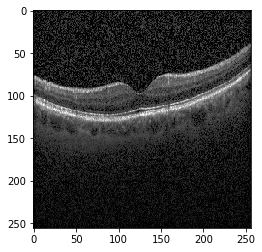

In [14]:
import matplotlib.pyplot as plt
plt.imshow(test_image)
# now to convert to 3 dimensional from 2d
test_image=image.img_to_array(test_image)
print(test_image.size)


In [15]:
#test_image=image.img_to_array(test_image)
test_image= np.expand_dims(test_image,axis=0)


In [16]:
train_generator.class_indices

{'CNV': 0, 'DME': 1, 'DRUSEN': 2, 'NORMAL': 3}

In [17]:
result=np.argmax(model.predict(test_image))
print(result)

3


**Getting convolutional layer filter maps. I just made the below function more like a utility function to quickly get all convolutional layers filters and biases. **

In [18]:
def get_name_layer_filters(model):
    filter_whole=[]
    layer_whole=[]
    for layer in model.layers:
        if 'conv' not in layer.name:
            continue
        filters,biases=layer.get_weights()
        filter_whole.append(filters)
        layer_whole.append(biases)
        print(layer.name,filters.shape)
    return filter_whole,layer_whole    
        

**Here we call the function above this function call returns filters and biases**

In [19]:
filter_whole,layer_whole=get_name_layer_filters(model)

conv2d_1 (3, 3, 3, 32)
conv2d_2 (3, 3, 32, 64)
conv2d_3 (3, 3, 64, 128)
conv2d_4 (3, 3, 128, 128)


**We take exactly the first convolutional layer and get filters and biases**

In [20]:
filters,biases=model.layers[1].get_weights()

**Normalizing the filters**

In [21]:
f_min,f_max=filters.min(),filters.max()
filters=(filters-f_min)/(f_max-f_min)

**Plotting the filters**

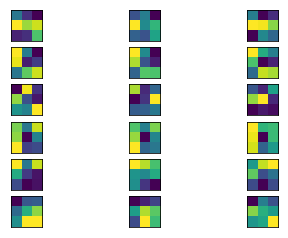

In [22]:
from matplotlib import pyplot
n_filters,ix=6,1
for i in range(n_filters):
    f=filters[:,:,:,i]
    #Plot each channel
    for j in range(3):
        ax=pyplot.subplot(n_filters,3,ix)
        ax.set_xticks([])
        ax.set_yticks([])
        #Plot filter channel
        pyplot.imshow(f[:,:,j])
        ix+=1
        
pyplot.show()    

**Starting with the plotting**

**Making a model from feature map.We will start with making a model with outputs from 1st convolution layer of model and input from model.**


In [23]:
#FEATURE MAP
model_feature=Model(inputs=model.inputs,outputs=model.layers[4].output)

**Using previous model to predict test_image**

In [24]:
#We use result from previous
feature_map=model_feature.predict(test_image)


In [25]:
feature_map.shape

(1, 125, 125, 64)

**Plot feature maps**

32 feature maps will be plotted. We will try to analyze these maps and interpret them in a useful way after plotting them.

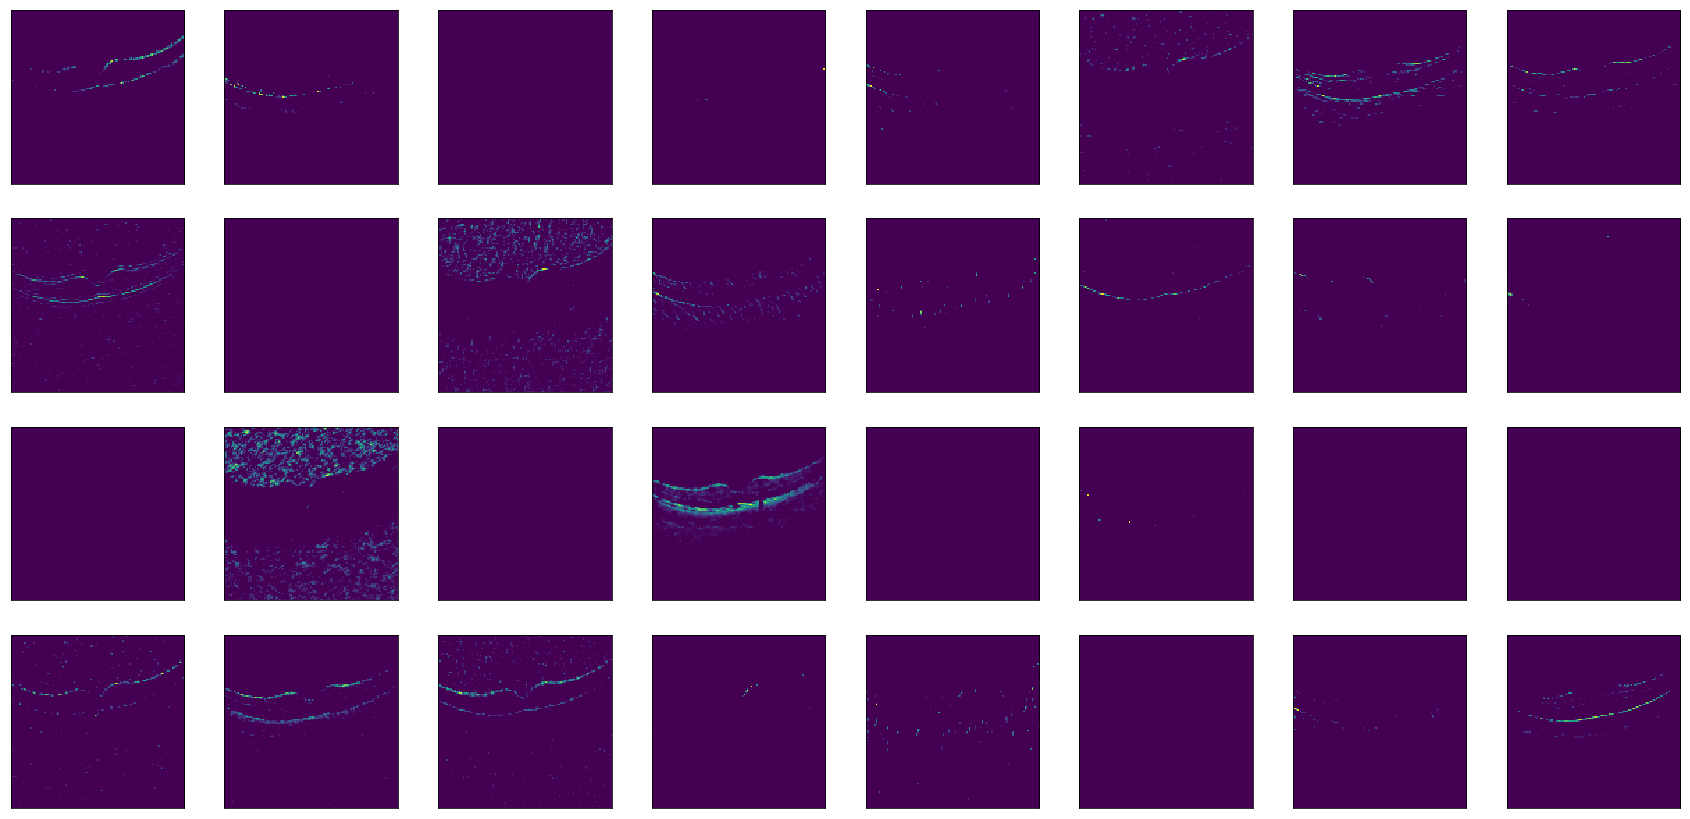

In [26]:
#plot all 32 maps in an 8*4 squares
pyplot.figure(figsize=(30,30))        
        
square=8
ix=1
for _ in range(4):
    for _ in range(8):
        ax=pyplot.subplot(square,square,ix)
        ax.set_xticks([])
        ax.set_yticks([])
        pyplot.imshow(feature_map[0,:,:,ix-1])
        ix+=1
        
pyplot.show()

**We can well observe that our model in its first convolutional layer is trying to detect features as evident from feature maps above.We can even observe edge detections as observed in the subplot(2,5).The model tries to detect the image and is studying its features. Some of these features can be easily seen by human eye. Higher the convoluional layers finer these detections become as becomes evident when we further plot next convolutional layers.**


**Now implementing above feature map plotting for all convolution layer.**

**This function returns models from all convolutional layers in our model**

In [27]:
def get_convolutional_layers(model):
    convolutions_models=[]
    for layer in model.layers:
        if 'conv2d' not in layer.name:
            continue
        model_temp=Model(inputs=model.inputs,outputs=layer.output)
        convolutions_models.append(model_temp)
    return convolutions_models    
        
        

**This function returns feature maps and models list**

In [28]:
#To see each feature map systematically for every convolutional layer
def generate_feature_maps(model,test_image):
    models=get_convolutional_layers(model)#Fetching convolution layers models
    feature_maps=[]
    
    for model_temp in models:
        feature_map=model_feature.predict(test_image)
        feature_maps.append(feature_map)
    return feature_maps,models    


**This function plots 32 feature maps.**

In [29]:
def plot_graph(feature_map):
    
    #plot all 32 maps in an 8*4 squares
    pyplot.figure(figsize=(30,30))        
        
    square=8
    ix=1
    for _ in range(4):
        for _ in range(8):
            ax=pyplot.subplot(square,square,ix)
            ax.set_xticks([])
            ax.set_yticks([])
            pyplot.imshow(feature_map[0,:,:,ix-1])
            ix+=1
        
    pyplot.show()

**Generating plots and showing original image.**

In [30]:
def plots_generator(model):
    print("IMAGE UNDER CONSIDERATION")
    test_image=image.load_img(im1_path,target_size=(256,256))
    plt.imshow(test_image)
    test_image=image.img_to_array(test_image)

    test_image= np.expand_dims(test_image,axis=0)
    print()
    feature_maps,models=generate_feature_maps(model,test_image)
    #ax=pyplot.subplot(square,square,ix)# only 32 filters will be shown of each layer
    counter=1
    for each_map in feature_maps:
        print("Convolutional Layer Number {} ".format(counter))
        counter+=1
        #ax=pyplot.subplot(square,square,ix)
        plot_graph(each_map)


**Function to start with plotting feature maps.**

IMAGE UNDER CONSIDERATION

Convolutional Layer Number 1 


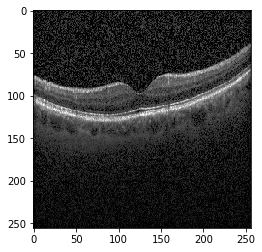

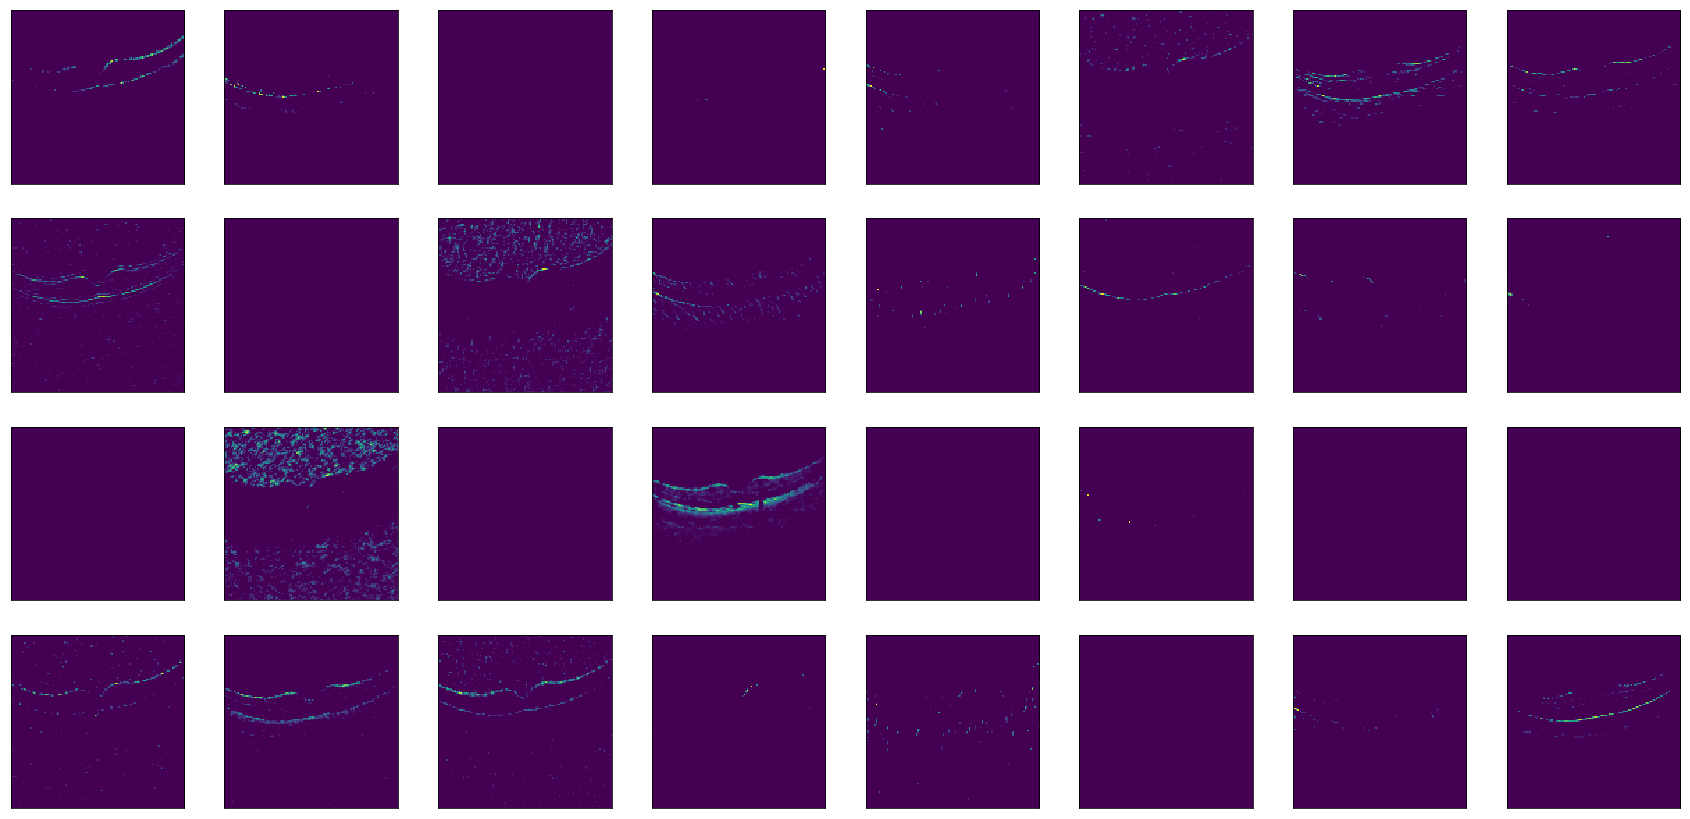

Convolutional Layer Number 2 


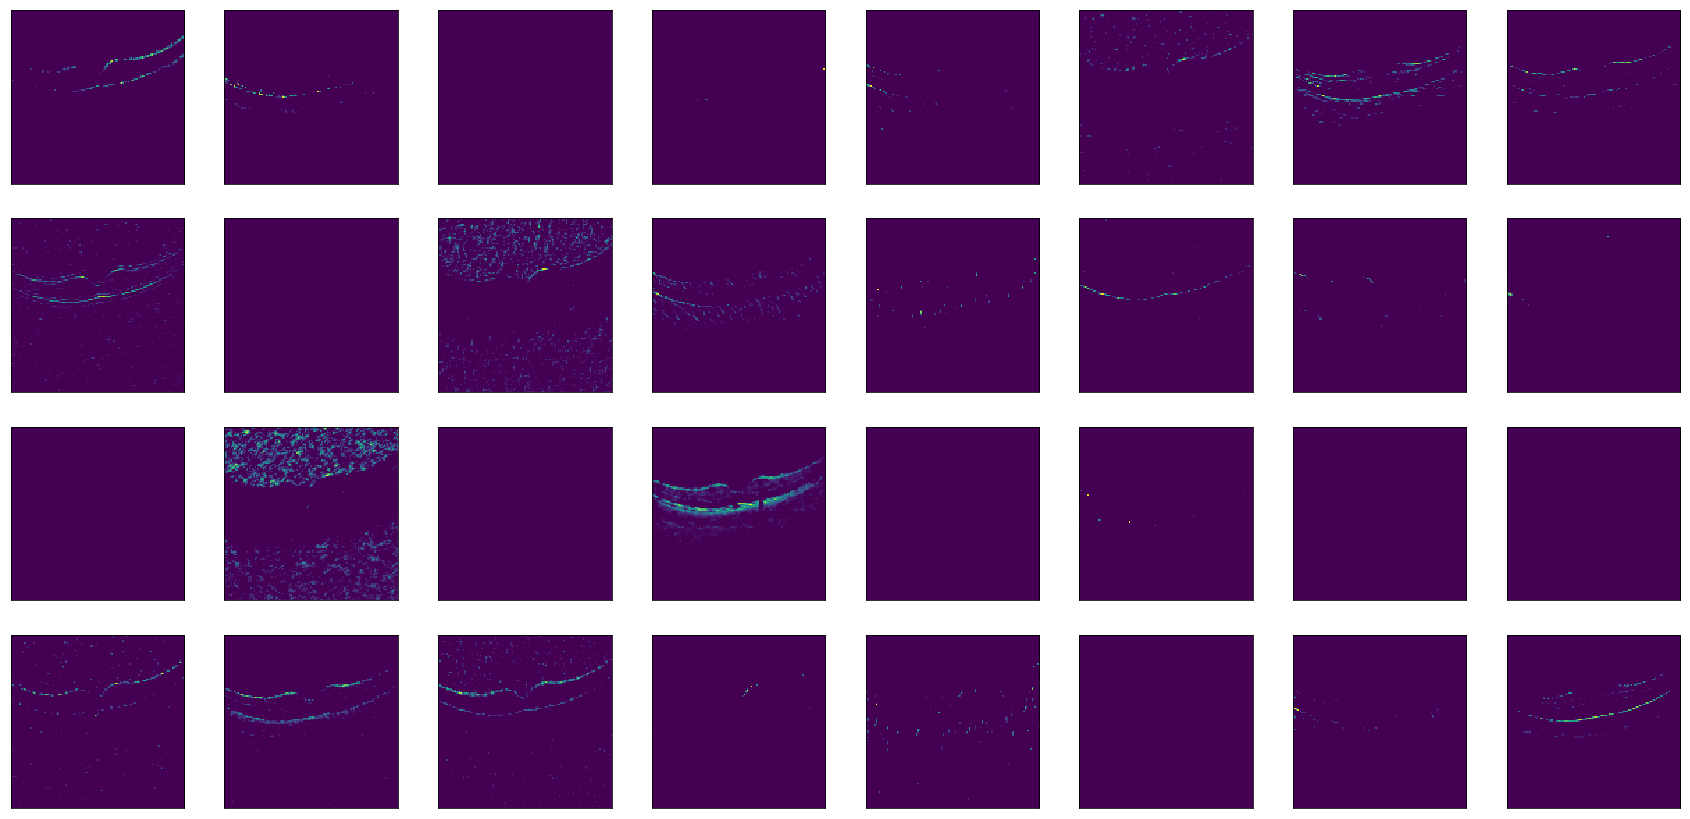

Convolutional Layer Number 3 


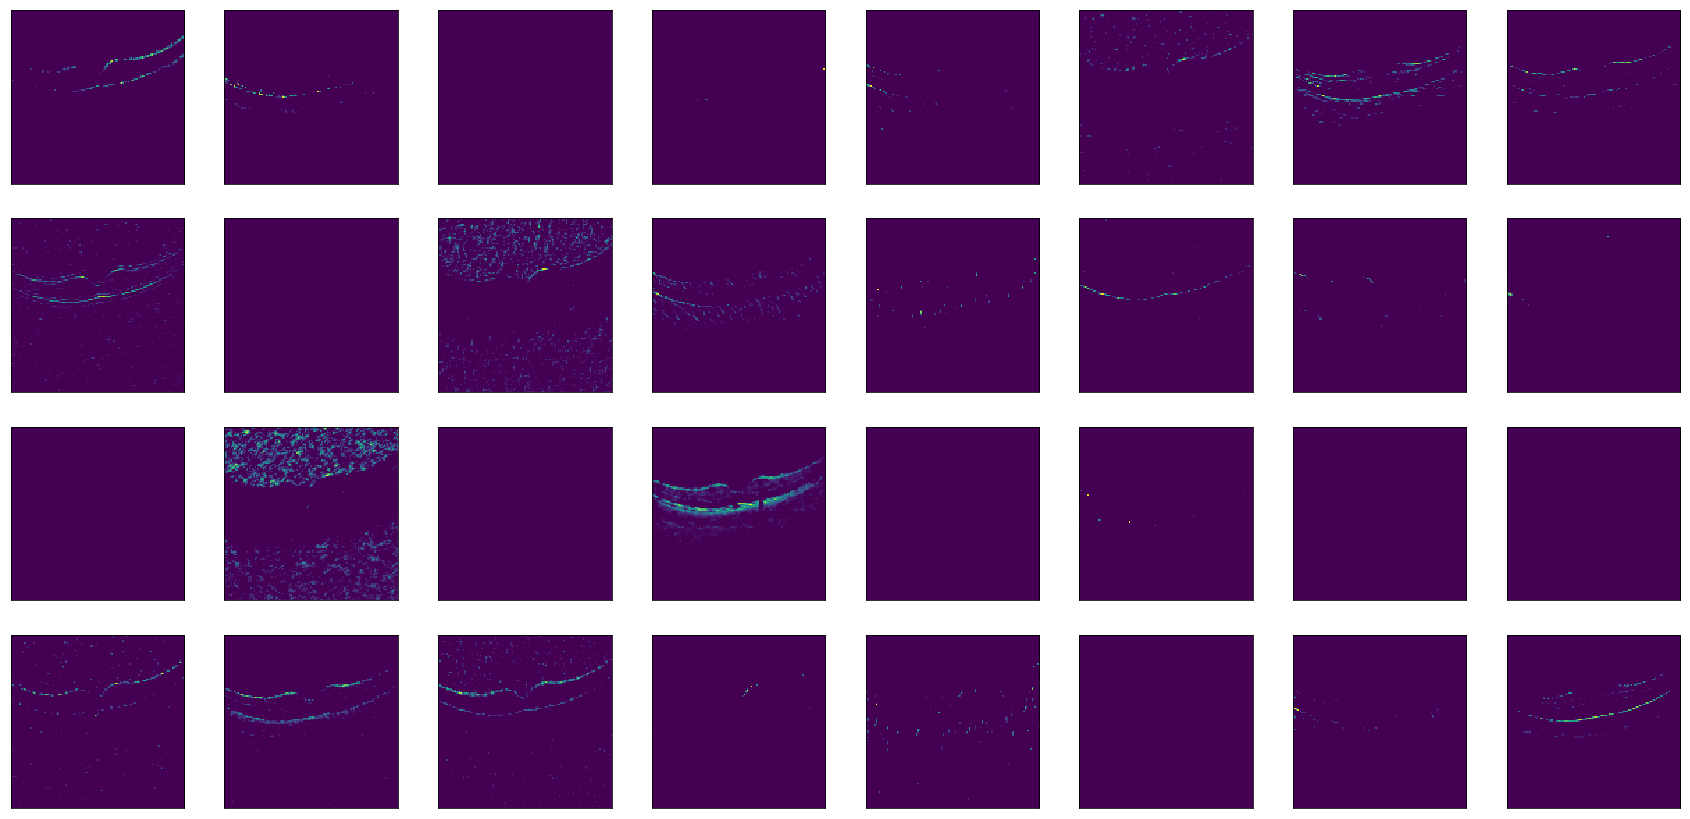

Convolutional Layer Number 4 


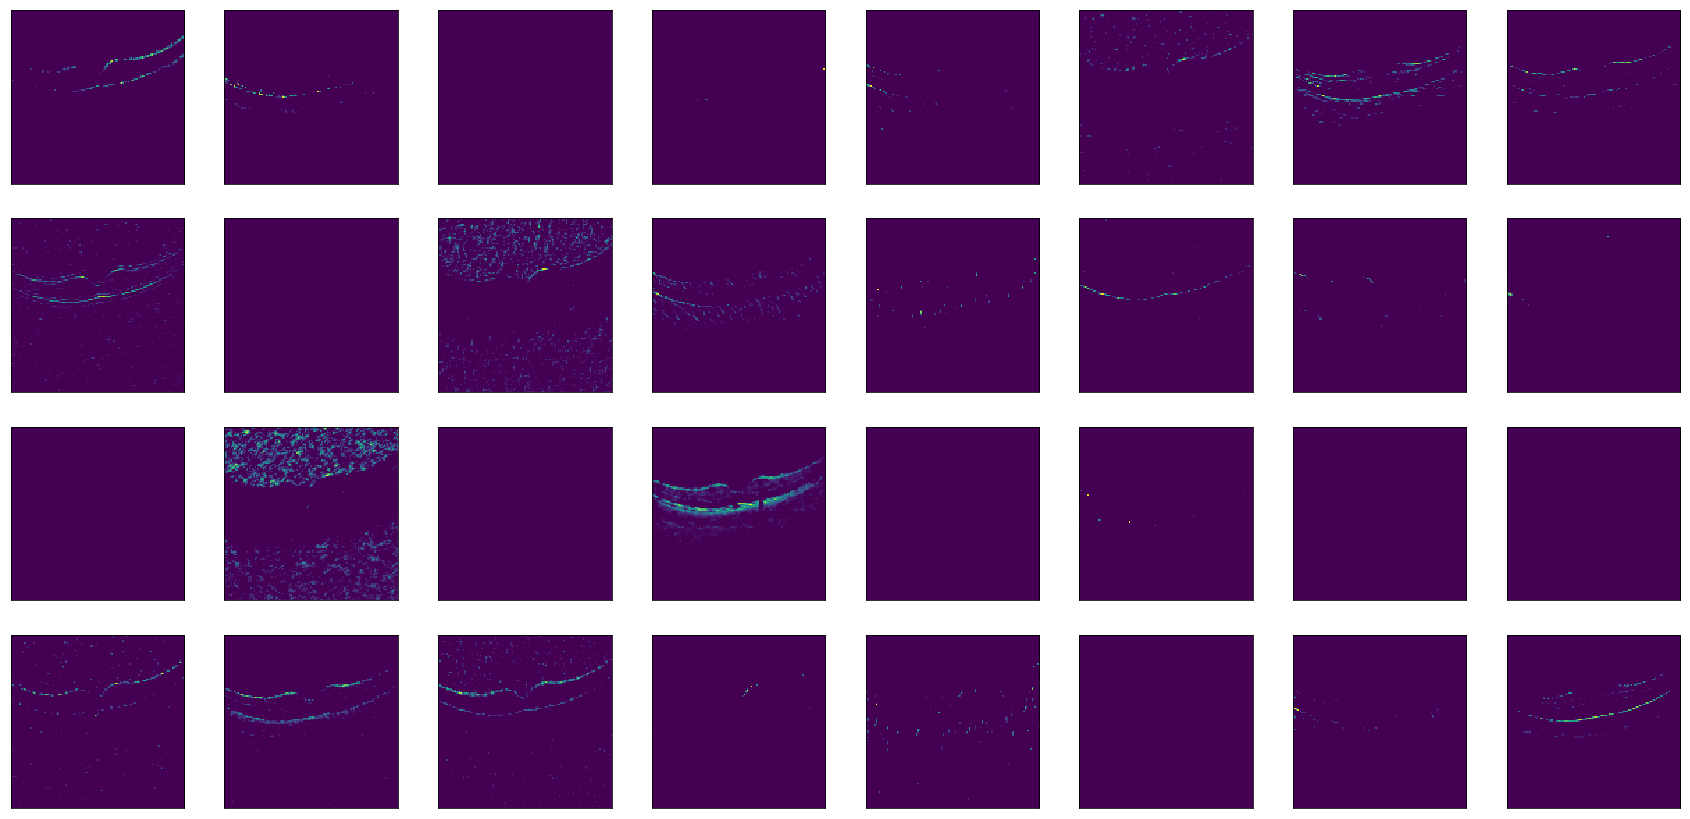

In [31]:

plots_generator(model)

**Now as we can observe as we move into deeper convolutional layers features get more refined and clearer. We can also add up custom filters which may lead to better feature detection, however let's keep it for our next kernel.**

In [32]:
hist.history['val_acc']

[0.5521632707065361,
 0.8363985181264885,
 0.8934572638264091,
 0.9110214342418629,
 0.9565346927966102,
 0.9235247419952368,
 0.9640116432918762,
 0.9513760254035459,
 0.944286281779661,
 0.9461166975390315]

**Checking Validation accuracies**

In [33]:
def val_acc_plot():
    print("FOR MODEL VALIDATION DATA")
    plt.plot(hist.epoch,hist.history['val_acc'])
    plt.xlabel("EPOCHS")
    plt.ylabel("Validation Accuracy")
    

In [34]:
def generate_images(all_paths):
    test_images=[]
    interpret=train_generator.class_indices
    test_y=[]
    
    for path in all_paths:
        y=''
        if 'DME' in path:
            y='DME'
        elif 'DRUSEN' in path:   
            y='DRUSEN'
        elif 'CNV' in path:   
            y='CNV'
        elif 'NORMAL' in path:   
            y='NORMAL'    
        
        for image_path in os.listdir(path):
            new_path=os.path.join('../input/oct2017/OCT2017 /test',y)
            #print(new_path)
            
            new_path=os.path.join(new_path,image_path)
            if 'Store' in str(new_path):
                continue
            temp_images=image.load_img(new_path,target_size=(256,256))
            temp_images=image.img_to_array(temp_images)
            test_images.append(temp_images)
            test_y.append(interpret[y])
    return test_images,test_y        


In [35]:
def generate_predictions(test_images,model):
    predictions=np.argmax(model.predict(test_images),axis=1)
    return predictions
    

In [36]:
from sklearn import metrics

def convert_data(model):
    # Now testing all test images to find test set accuracy.
    #We first need to put all test images and convert them in desired format to predict
    #Firstly we store path of test directory
    PATH_TEST="../input/oct2017/OCT2017 /test"
    all_paths=[]
    print("GENERATING PATHS")
    for directory in os.listdir(PATH_TEST):
        if 'Store' in directory:
            continue
        all_paths.append(os.path.join(PATH_TEST,directory))
    
    test_images,test_y=generate_images(all_paths)
    print("PATH GENERATED")
    test_images=np.array(test_images)
    print("GENERATING PREDICTIONS")
    predictions=generate_predictions(test_images,model)
    print("PREDICTIONS GENERATED")
    print()
    print("ACCURACY OF MODEL FOR TEST DATA IS {}".format(metrics.accuracy_score(test_y, predictions)))
    
    


In [37]:
convert_data(model)

GENERATING PATHS
PATH GENERATED
GENERATING PREDICTIONS
PREDICTIONS GENERATED

ACCURACY OF MODEL FOR TEST DATA IS 0.7830578512396694


**We will try to better accuracy and try increasing it above 90 atleast in continuation of this kernel later on.**